In [29]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model, Sequential

In [30]:
#Inspection and a little cleaning
data = pd.read_csv(r"C:\Users\brand\OneDrive\Documents\Bootcamp Projects\Capstone Project 2\Cleaned Data\Csv_CD.csv")
data = data.drop(columns=['Unnamed: 0'])
data = data.sort_values('Year_of_Release')
cm = sns.light_palette("blue", as_cmap=True)
data.head(10).style.background_gradient(cmap=cm)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
657,Battle Arena Toshinden,PS,1994,Fighting,Sony Computer Entertainment,0.390000,0.260000,0.530000,0.080000,1.270000,69,4,6.300000,4,Tamsoft,T
446,PaRappa The Rapper,PS,1996,Misc,Sony Computer Entertainment,0.260000,0.160000,1.460000,0.030000,1.920000,92,15,7.400000,48,NanaOn-Sha,K-A
143,Tomb Raider,PS,1996,Action,Eidos Interactive,2.290000,1.970000,0.130000,0.240000,4.630000,91,13,8.600000,147,Core Design Ltd.,T
101,Tekken 2,PS,1996,Fighting,Sony Computer Entertainment,2.260000,1.890000,1.360000,0.230000,5.740000,89,8,8.900000,102,Namco,T
128,Resident Evil,PS,1996,Action,Virgin Interactive,2.050000,1.160000,1.110000,0.730000,5.050000,91,8,9.000000,266,Capcom,M
1164,RPG Maker,PS,1997,Role-Playing,ASCII Entertainment,0.110000,0.070000,0.290000,0.030000,0.500000,66,11,8.200000,9,Kuusou Kagaku,E
33,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.020000,3.870000,2.540000,0.520000,10.950000,96,16,8.700000,138,Polyphony Digital,E
351,Final Fantasy Tactics,PS,1997,Role-Playing,SquareSoft,0.930000,0.120000,1.340000,0.060000,2.450000,83,12,8.200000,190,SquareSoft,T
709,Bushido Blade,PS,1997,Fighting,Sony Computer Entertainment,0.390000,0.270000,0.430000,0.080000,1.160000,83,13,7.900000,16,Light Weight,T
649,Castlevania: Symphony of the Night,PS,1997,Platform,Konami Digital Entertainment,0.580000,0.400000,0.210000,0.080000,1.270000,93,12,9.400000,358,Konami,T


In [31]:
# getting initial dataframe info
print(data.describe())
print('-'*80)
print("Dataframe shape:\n",data.shape)
print('-'*80)
data.info()
print('-'*80)
print('Null value counts:\n',data.isnull().sum())
print('-'*80)
print('Feature dtypes:\n', data.dtypes)

       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      1688.000000  1688.000000  1688.000000  1688.000000  1688.000000   
mean       2008.402844     0.866943     0.590545     0.238098     0.203004   
std           4.332920     1.752000     1.250427     0.533606     0.492268   
min        1994.000000     0.010000     0.010000     0.010000     0.010000   
25%        2006.000000     0.150000     0.070000     0.020000     0.030000   
50%        2009.000000     0.360000     0.220000     0.070000     0.080000   
75%        2012.000000     0.920000     0.622500     0.210000     0.210000   
max        2016.000000    41.360000    28.960000     6.500000    10.570000   

       Global_Sales  Critic_Score  Critic_Count   User_Score    User_Count  
count   1688.000000   1688.000000   1688.000000  1688.000000   1688.000000  
mean       1.898199     75.927725     42.361967     7.568246    325.350118  
std        3.577727     11.476560     22.170379     1.132517    73

In [32]:
features_to_keep= ['Critic_Score','Critic_Count','User_Score','User_Count','Global_Sales']


In [33]:
#Prepocessing,cleaning and selection
features_to_keep= ['Platform','Genre','Rating','Critic_Score','Critic_Count','User_Score','User_Count','Global_Sales','Year_of_Release']
f_df = data[features_to_keep].reset_index(drop=True).sort_values('Year_of_Release')
# Checking for 0 values
zero_values = (f_df == 0).sum()
print(zero_values)

# Found Global sales column has 0 values and removed them.
f_df = f_df[f_df['Global_Sales'] != 0]

f_df.reset_index(drop=True, inplace=True)
df2 = f_df
df2.head()
df2.shape


Platform           0
Genre              0
Rating             0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Global_Sales       0
Year_of_Release    0
dtype: int64


(1688, 9)

In [34]:
#scaling and getting dummies
scaler = StandardScaler()
df2['Global_Sales'] = scaler.fit_transform(df2[['Global_Sales']])
df2 = pd.get_dummies(df2)

final_df = df2.sort_values(by=['Year_of_Release'], axis=0)
final_df.head()


,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Year_of_Release,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_T
0,69,4,6.3,4,-0.175638,1994,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,92,15,7.4,48,0.006095,1996,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,91,13,8.6,147,0.763784,1996,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,89,8,8.9,102,1.074129,1996,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,91,8,9.0,266,0.881212,1996,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [35]:
#splitting
X= final_df.drop(columns=['Global_Sales'])
y= final_df['Global_Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
#T_data= final_df['Global_Sales'] #Train data
#T_data.dtypes
#train_data_normalized = torch.FloatTensor(T_data).view(-1)
X_train.shape

(1181, 38)

In [70]:
#Had to convert all dytpes for the tensor to work. Does not take int dtypes.
#ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

#Build and train model, got help from a datacamp course Introduction to Deep Learning with Keras.
model = Sequential()
model.add(Dense(16, input_shape=(38,), activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print('Here comes the numbers!\n This could take a minute........')
model.fit(X_train, y_train, epochs=128)

Here comes the numbers!
 This could take a minute........
Epoch 1/128
37/37 [==============================] - 0s 953us/step - loss: 3307.9534
Epoch 2/128
37/37 [==============================] - 0s 538us/step - loss: 258.6441
Epoch 3/128
37/37 [==============================] - 0s 462us/step - loss: 40.3133
Epoch 4/128
37/37 [==============================] - 0s 462us/step - loss: 14.9728
Epoch 5/128
37/37 [==============================] - 0s 466us/step - loss: 8.0603
Epoch 6/128
37/37 [==============================] - 0s 923us/step - loss: 6.1654
Epoch 7/128
37/37 [==============================] - 0s 463us/step - loss: 5.5113
Epoch 8/128
37/37 [==============================] - 0s 467us/step - loss: 4.9819
Epoch 9/128
37/37 [==============================] - 0s 461us/step - loss: 4.7631
Epoch 10/128
37/37 [==============================] - 0s 903us/step - loss: 4.5635
Epoch 11/128
37/37 [==============================] - 0s 427us/step - loss: 4.4353
Epoch 12/128
37/37 [===========

In [38]:
#Converting again does not accept int values only floats.
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

model.evaluate(X_val,y_val)

y_pred = model.predict(X_train)

37/37 [==============================] - 0s 498us/step


In [39]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                624       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


C:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

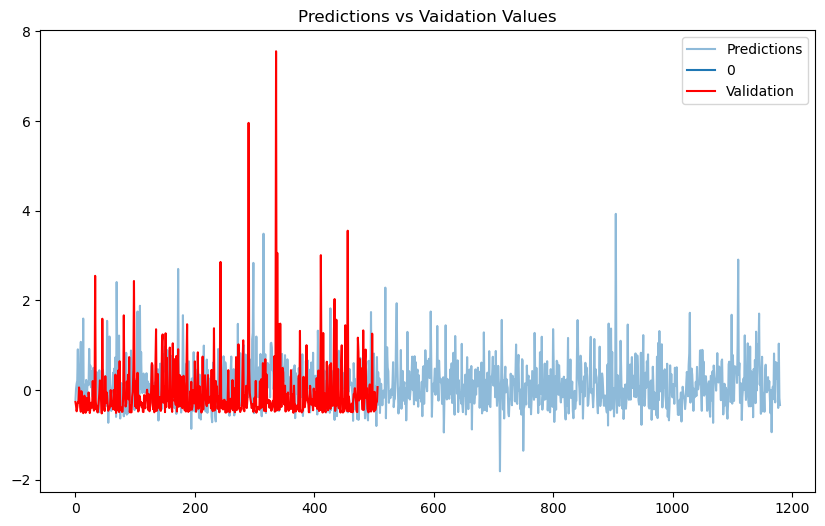

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(y_pred, color='blue', label='Predictions',alpha=0.5)
sns.lineplot(y_val, color='red', label='Validation')
plt.title('Predictions vs Vaidation Values')
plt.legend()
plt.show()